# Part I - (Prosper Loan Data Exploration)
## by Egwuda Ojonugwa

## Introduction
The aim of this project is to analyze data from Prosper Marketplace, a company that majors in providing loans at low interest rates to borrowers. The dataset for this project was provided by Udacity and contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income etc. 



## Preliminary Wrangling
We will start by loading the necessary modules, then import our dataset and read it into a pandas dataframe.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#read the dataset
ploan = pd.read_csv('prosperLoanData.csv')

In [3]:
ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
ploan.shape

(113937, 81)

In [6]:
ploan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> This dataset comprises of 113,937 rows and 81 columns, most of the data is numeric which is expected, we will convert all the data columns from object to datatime.

### What is/are the main feature(s) of interest in your dataset?

> The dataset contains tons of data, the main interest I would like to know is the demography of borrowers ie the state the borrower is. also I would like to know if the borrower is a house owner and their employment status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> BorrowerState, IsBorrowerHomeowner, LoanOriginalAmount, LoanStatus, IncomeRange, Occupation.

In [7]:
#creating a dataframe with features names to be used
interest = ['BorrowerState', 'IsBorrowerHomeowner', 'LoanOriginalAmount', 'LoanStatus', 'IncomeRange', 'Occupation',
            'ListingCreationDate', 'IncomeVerifiable', 'ListingCategory (numeric)', 'DebtToIncomeRatio', 'Term', 'StatedMonthlyIncome',
            'ProsperRating (Alpha)', 'EmploymentStatus', 'BorrowerAPR']

In [8]:
ploan[interest].sample(5)

,BorrowerState,IsBorrowerHomeowner,LoanOriginalAmount,LoanStatus,IncomeRange,Occupation,ListingCreationDate,IncomeVerifiable,ListingCategory (numeric),DebtToIncomeRatio,Term,StatedMonthlyIncome,ProsperRating (Alpha),EmploymentStatus,BorrowerAPR
71466,NY,True,10000,Defaulted,Not displayed,Other,2007-01-03 05:44:04.637000000,True,0,0.25,36,9750.000000,NaN,Not available,0.14006
9266,WA,False,16500,Current,"$25,000-49,999",Other,2012-09-22 03:36:20.433000000,True,1,0.24,36,3943.416667,C,Employed,0.24758
12176,TX,False,4000,Current,"$1-24,999",Other,2012-10-25 17:30:20.220000000,True,19,0.27,36,1666.666667,HR,Employed,0.35797
40089,TX,True,7500,Completed,"$100,000+",Attorney,2011-11-06 19:31:00.940000000,True,7,0.14,36,26250.000000,E,Employed,0.35132
102443,TX,False,20000,Current,"$75,000-99,999",Professional,2013-01-16 07:11:26.383000000,True,1,0.25,36,7000.000000,C,Employed,0.23121


In [9]:
ploan[interest].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BorrowerState              108422 non-null  object 
 1   IsBorrowerHomeowner        113937 non-null  bool   
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   IncomeRange                113937 non-null  object 
 5   Occupation                 110349 non-null  object 
 6   ListingCreationDate        113937 non-null  object 
 7   IncomeVerifiable           113937 non-null  bool   
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   DebtToIncomeRatio          105383 non-null  float64
 10  Term                       113937 non-null  int64  
 11  StatedMonthlyIncome        113937 non-null  float64
 12  ProsperRating (Alpha)      84853 non-null   object 
 13  EmploymentStatus           11

In [10]:
#checking for duplicates
ploan[interest].duplicated().sum()

871

## Data Cleaning

In [11]:
#make copy of the dataset
new_ploan = ploan.copy()

In [12]:
#Sort the new features to be used from the main dataset
new_ploan = new_ploan[interest]

In [13]:
new_ploan[interest].head()

,BorrowerState,IsBorrowerHomeowner,LoanOriginalAmount,LoanStatus,IncomeRange,Occupation,ListingCreationDate,IncomeVerifiable,ListingCategory (numeric),DebtToIncomeRatio,Term,StatedMonthlyIncome,ProsperRating (Alpha),EmploymentStatus,BorrowerAPR
0,CO,True,9425,Completed,"$25,000-49,999",Other,2007-08-26 19:09:29.263000000,True,0,0.17,36,3083.333333,NaN,Self-employed,0.16516
1,CO,False,10000,Current,"$50,000-74,999",Professional,2014-02-27 08:28:07.900000000,True,2,0.18,36,6125.000000,A,Employed,0.12016
2,GA,False,3001,Completed,Not displayed,Other,2007-01-05 15:00:47.090000000,True,0,0.06,36,2083.333333,NaN,Not available,0.28269
3,GA,True,10000,Current,"$25,000-49,999",Skilled Labor,2012-10-22 11:02:35.010000000,True,16,0.15,36,2875.000000,A,Employed,0.12528
4,MN,True,15000,Current,"$100,000+",Executive,2013-09-14 18:38:39.097000000,True,2,0.26,36,9583.333333,D,Employed,0.24614


In [14]:
#Drop the duplicates
new_ploan = new_ploan.drop_duplicates()

In [15]:
#Rename inappropriate columns
new_ploan = new_ploan.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

In [16]:
#convert from object to datetime
new_ploan.ListingCreationDate = pd.to_datetime(ploan.ListingCreationDate)

In [17]:
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
new_ploan.ListingCategory = new_ploan.ListingCategory.map(category_titles)

new_ploan.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [18]:
#Change Not employed in IncomeRange with $0
new_ploan.IncomeRange = new_ploan.IncomeRange.str.replace('Not employed', '$0')

In [19]:
#Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating']

#Estimate the number of null records in each column with a list comprehension
null_counts = [new_ploan[col].isnull().sum() for col in null_columns]

#Calculate the total proportion of null values in the dataframe
null_proportion = sum(null_counts) / ploan.shape[0]

print('The combined percentage of null records is ' + str(null_proportion * 100)[:4] + '%')

The combined percentage of null records is 25.5%


We will drop null records percentage lesser than 30%

In [20]:
for col in null_columns:
    new_ploan = new_ploan[new_ploan[col].notnull()]

#Check
for col in null_columns:
    assert new_ploan[col].notnull().any()

In [21]:
#Convert ProsperRating and IncomeRange to ordered categorical types
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

#Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    new_ploan[key] = new_ploan[key].astype(correct_order)

#Check
new_ploan[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

## Additional Data for Location
The location identified in the BorrowerState column is abreviated and will be better if it is in full format hence getting additional data to visualize this is necessary.

we pulled this data from Github as a user already uploaded the needed data

Credit: [Rashida048](https://github.com/rashida048)

In [22]:
url = 'https://raw.githubusercontent.com/rashida048/Exploratory-data-Analysis-in-R/main/statelatlong.csv'
response = requests.get(url)
with open('location.csv', 'wb') as file:
    file.write(response.content)

In [23]:
location = pd.read_csv('location.csv')

In [24]:
location.head()

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [25]:
#Merge the new location data with the dataset we cleaned
final = pd.merge(new_ploan, location, left_on = 'BorrowerState', right_on = 'State')

In [26]:
final.head()

,BorrowerState,IsBorrowerHomeowner,LoanOriginalAmount,LoanStatus,IncomeRange,Occupation,ListingCreationDate,IncomeVerifiable,ListingCategory,DebtToIncomeRatio,Term,StatedMonthlyIncome,ProsperRating,EmploymentStatus,BorrowerAPR,State,Latitude,Longitude,City
0,CO,False,10000,Current,"$50,000-74,999",Professional,2014-02-27 08:28:07.900,True,Home Improvement,0.18,36,6125.000000,A,Employed,0.12016,CO,38.997934,-105.550567,Colorado
1,CO,True,4000,Completed,"$75,000-99,999",Executive,2010-06-16 16:23:44.533,True,Debt Consolidation,0.26,36,6666.666667,A,Full-time,0.11296,CO,38.997934,-105.550567,Colorado
2,CO,True,15000,Current,"$50,000-74,999",Professional,2013-05-01 08:18:59.183,True,Debt Consolidation,0.35,36,5416.666667,A,Employed,0.15833,CO,38.997934,-105.550567,Colorado
3,CO,True,4000,Completed,"$75,000-99,999",Construction,2011-11-13 20:05:58.260,True,Other,0.23,36,6250.000000,HR,Employed,0.35643,CO,38.997934,-105.550567,Colorado
4,CO,True,15000,Chargedoff,"$50,000-74,999",Truck Driver,2012-04-17 11:58:52.270,False,Business,NaN,36,5000.000000,D,Self-employed,0.26681,CO,38.997934,-105.550567,Colorado


In [27]:
final = final.rename(columns = {'BorrowerState': 'StateCode', 'City': 'BorrowerState'})

In [28]:
final.head()

,StateCode,IsBorrowerHomeowner,LoanOriginalAmount,LoanStatus,IncomeRange,Occupation,ListingCreationDate,IncomeVerifiable,ListingCategory,DebtToIncomeRatio,Term,StatedMonthlyIncome,ProsperRating,EmploymentStatus,BorrowerAPR,State,Latitude,Longitude,BorrowerState
0,CO,False,10000,Current,"$50,000-74,999",Professional,2014-02-27 08:28:07.900,True,Home Improvement,0.18,36,6125.000000,A,Employed,0.12016,CO,38.997934,-105.550567,Colorado
1,CO,True,4000,Completed,"$75,000-99,999",Executive,2010-06-16 16:23:44.533,True,Debt Consolidation,0.26,36,6666.666667,A,Full-time,0.11296,CO,38.997934,-105.550567,Colorado
2,CO,True,15000,Current,"$50,000-74,999",Professional,2013-05-01 08:18:59.183,True,Debt Consolidation,0.35,36,5416.666667,A,Employed,0.15833,CO,38.997934,-105.550567,Colorado
3,CO,True,4000,Completed,"$75,000-99,999",Construction,2011-11-13 20:05:58.260,True,Other,0.23,36,6250.000000,HR,Employed,0.35643,CO,38.997934,-105.550567,Colorado
4,CO,True,15000,Chargedoff,"$50,000-74,999",Truck Driver,2012-04-17 11:58:52.270,False,Business,NaN,36,5000.000000,D,Self-employed,0.26681,CO,38.997934,-105.550567,Colorado


In [29]:
final.drop(columns = ['State'], inplace = True)

In [30]:
final.head()

,StateCode,IsBorrowerHomeowner,LoanOriginalAmount,LoanStatus,IncomeRange,Occupation,ListingCreationDate,IncomeVerifiable,ListingCategory,DebtToIncomeRatio,Term,StatedMonthlyIncome,ProsperRating,EmploymentStatus,BorrowerAPR,Latitude,Longitude,BorrowerState
0,CO,False,10000,Current,"$50,000-74,999",Professional,2014-02-27 08:28:07.900,True,Home Improvement,0.18,36,6125.000000,A,Employed,0.12016,38.997934,-105.550567,Colorado
1,CO,True,4000,Completed,"$75,000-99,999",Executive,2010-06-16 16:23:44.533,True,Debt Consolidation,0.26,36,6666.666667,A,Full-time,0.11296,38.997934,-105.550567,Colorado
2,CO,True,15000,Current,"$50,000-74,999",Professional,2013-05-01 08:18:59.183,True,Debt Consolidation,0.35,36,5416.666667,A,Employed,0.15833,38.997934,-105.550567,Colorado
3,CO,True,4000,Completed,"$75,000-99,999",Construction,2011-11-13 20:05:58.260,True,Other,0.23,36,6250.000000,HR,Employed,0.35643,38.997934,-105.550567,Colorado
4,CO,True,15000,Chargedoff,"$50,000-74,999",Truck Driver,2012-04-17 11:58:52.270,False,Business,NaN,36,5000.000000,D,Self-employed,0.26681,38.997934,-105.550567,Colorado


In [31]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 0 to 83981
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   StateCode            83982 non-null  object        
 1   IsBorrowerHomeowner  83982 non-null  bool          
 2   LoanOriginalAmount   83982 non-null  int64         
 3   LoanStatus           83982 non-null  object        
 4   IncomeRange          83982 non-null  category      
 5   Occupation           82708 non-null  object        
 6   ListingCreationDate  83982 non-null  datetime64[ns]
 7   IncomeVerifiable     83982 non-null  bool          
 8   ListingCategory      83982 non-null  object        
 9   DebtToIncomeRatio    76768 non-null  float64       
 10  Term                 83982 non-null  int64         
 11  StatedMonthlyIncome  83982 non-null  float64       
 12  ProsperRating        83982 non-null  category      
 13  EmploymentStatus     83982 non-

## Univariate Exploration
The exploration part, we will investigate different variables in the data, the Borrower is the person of interest as this data revolves around them.

#### Question 1: What was the employment status of the borrower?


#### Visualization

In [32]:
#choose the first tuple of RGB colours
base_color = sns.color_palette()[0]

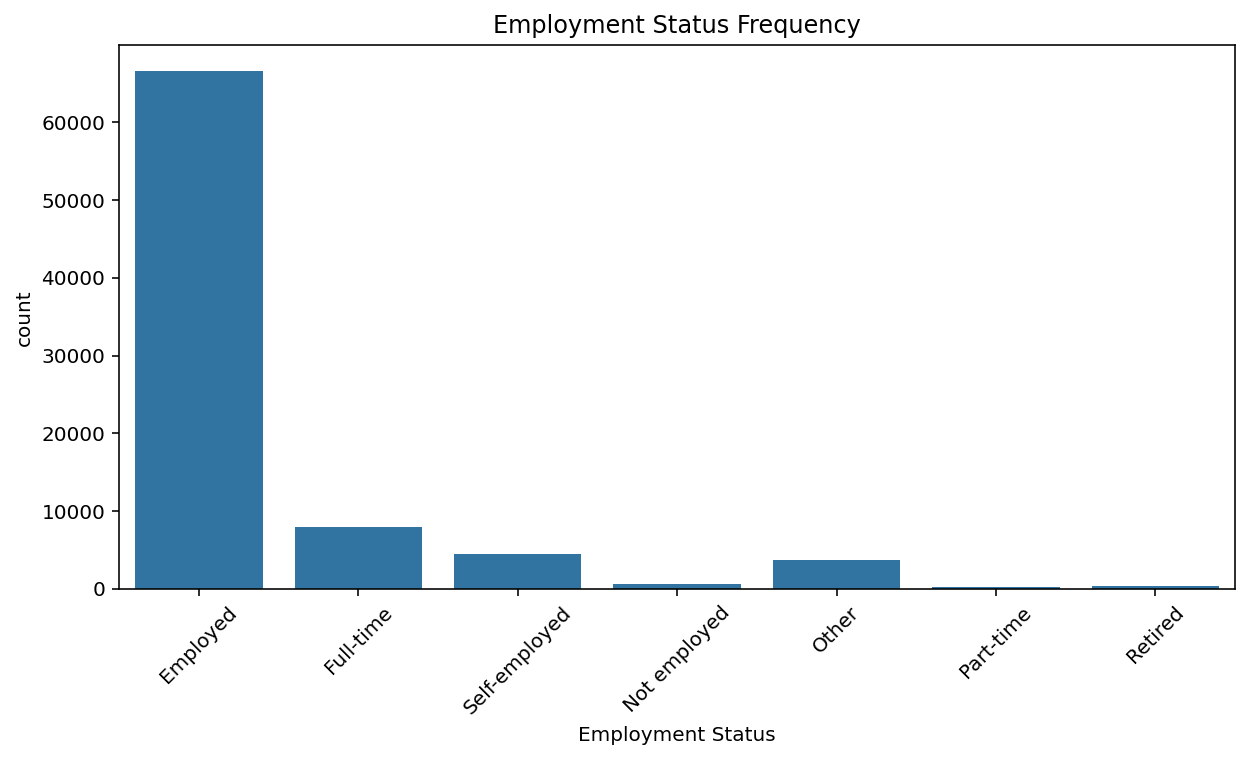

In [33]:
fig, axs = plt.subplots(figsize=(10, 5))
columns = ['EmploymentStatus']
sns.countplot(data=final, x='EmploymentStatus', color=base_color);
plt.xticks(rotation = 45);
plt.xlabel('Employment Status');
plt.title('Employment Status Frequency');

#### Observations
A large proportion of borrowers are employed which is reasonable as they need to be employed to pay back their loans, also some borrowers are Full time workers, a good sign as it will be hard to get a loan without a Job.

#### Question 2: What are the loan terms? ie. length of the loan in months


#### Visualization

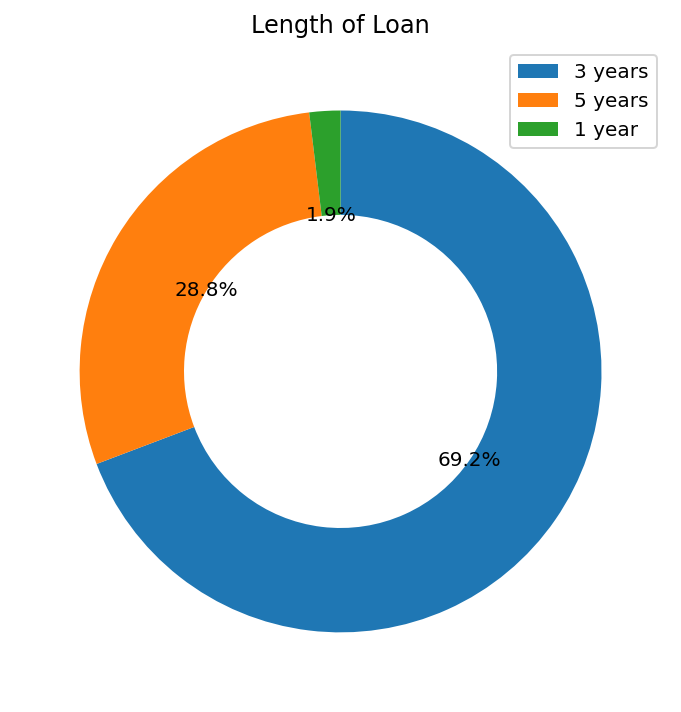

In [34]:
fig, axs = plt.subplots(figsize=(12, 6))
pie_chart = final.Term.value_counts()
plt.pie(pie_chart, autopct = '%1.1f%%', startangle = 90, counterclock = False, wedgeprops = {'width': 0.4})
plt.title('Length of Loan')
plt.legend(labels = ['3 years', '5 years', '1 year']);

#### Observations
The most term for loan is a 3 years spread which is understandable and fair for a long term loan as it is easier to pay back for people who are employed. 12 months loan had the least frequecy rate.

#### Question 3: What is the distribution of borrower APR "Annual Percentage Rate" in the dataset


#### Visualization

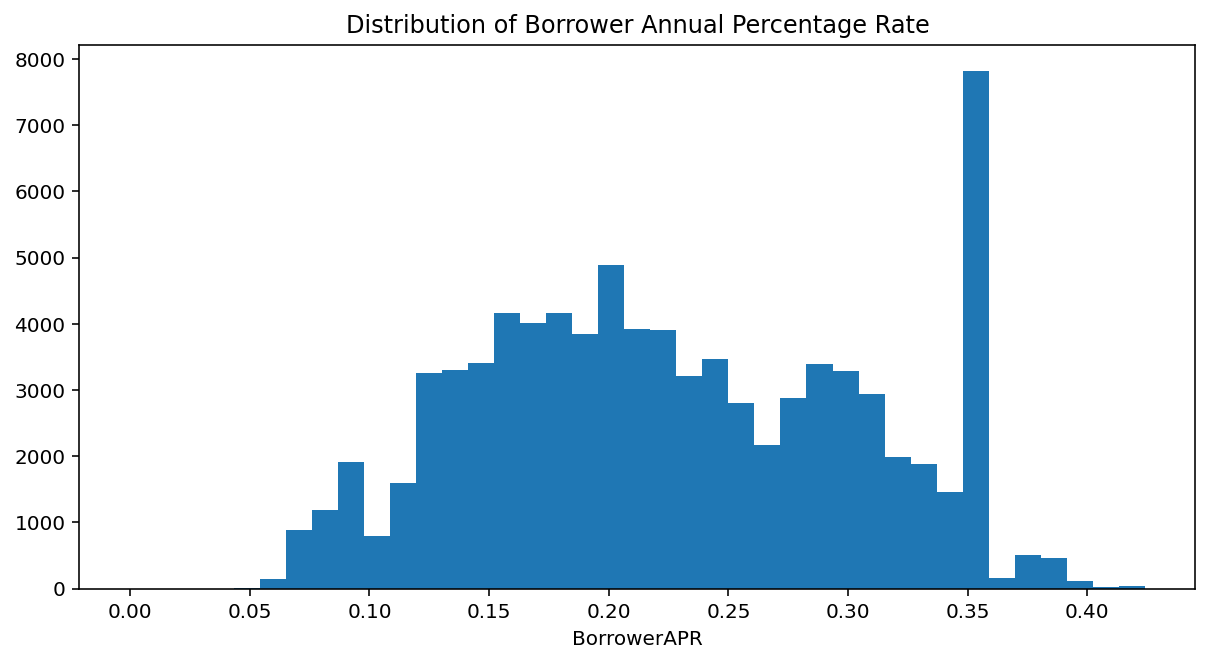

In [35]:
bins = np.linspace(0, final.BorrowerAPR.max(), 40)
plt.figure(figsize = (10, 5))
plt.hist(data = final, x = 'BorrowerAPR', bins = bins, color = base_color)
plt.title('Distribution of Borrower Annual Percentage Rate')
plt.xticks(np.arange(0, 0.45, 0.05))
plt.xlabel('BorrowerAPR');

#### Observation
This is a multimodal distribuiton with 3 peaks and more, peaks are at 0.09, 0.21, 0.30 with an obvious sharp peak at 0.36. I will like to add that BorrowerAPR greater than 0.40 is the lowest.

#### Question 4: What State do the borrowers come from, does it play a role in them taking a loan?


#### Visualization

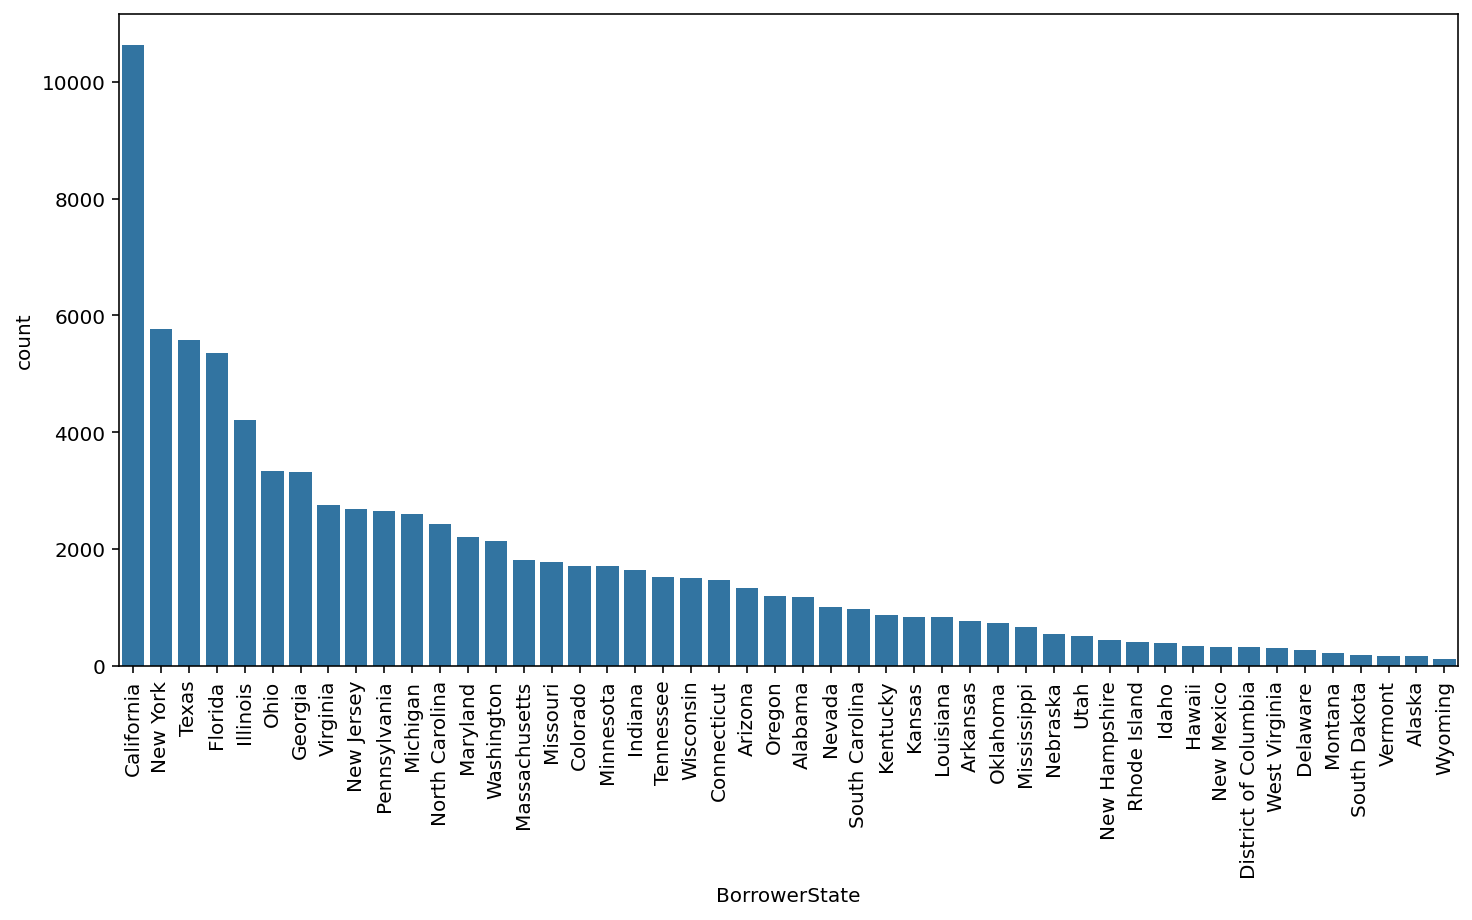

In [36]:
plt.figure(figsize = (12, 6))
order = final.BorrowerState.value_counts().index
sns.countplot(data = final, x = "BorrowerState", color = base_color, order = order)
plt.xticks(rotation = 90);

#### Observations
From the plot above, California has almost double the amount of borrowers than the next 3 states which are New york, Texas and Florida. According to an article on [Financebuzz](https://financebuzz.com/most-expensive-states-to-live#:~:text=Hawaii&text=Life%20in%20paradise%20comes%20at,at%20twice%20the%20national%20average.), California is one of the most expensive states to live in the USA and this maybe why people there are borrowing.
Wyoming, Alaska and Vermont have the least amount of borrowers.

#### Question 5: What Proportion of Borrowers are Homeowners and are their income verifiable?


#### Visualization

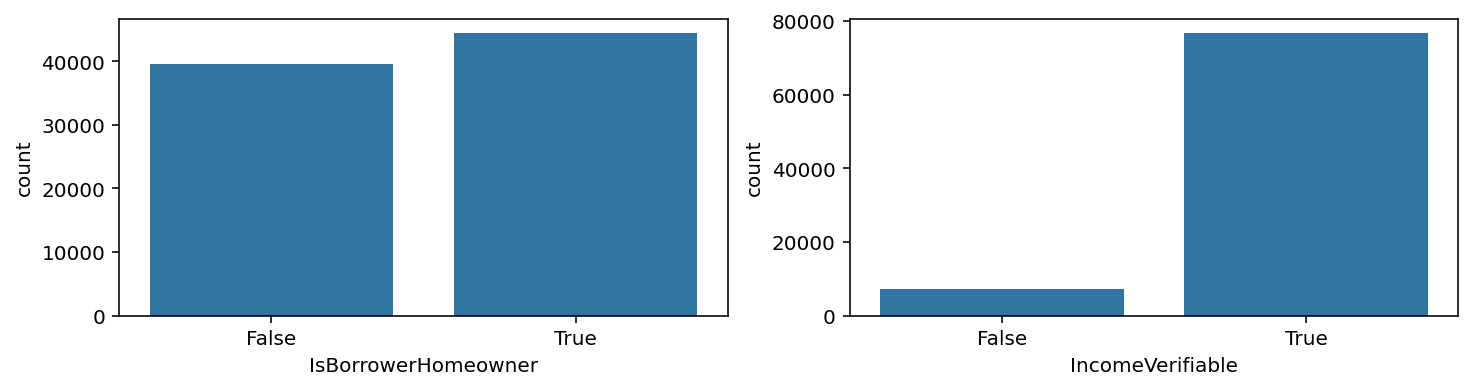

In [37]:
plt.figure(figsize = (12, 6))
plt.subplot(2,2,1)
sns.countplot(data = final, x = 'IsBorrowerHomeowner', color = base_color)

plt.subplot(2,2,2)
sns.countplot(data = final, x = 'IncomeVerifiable', color = base_color);

#### Observations
Most of the borrowers are homeowners with over 40,000, also a vast majority of Borrowers have a verifiable source of income and it's expected so as to be able to access the loan.

#### Question 6: What are the Borrower Occupation?


#### Visualization

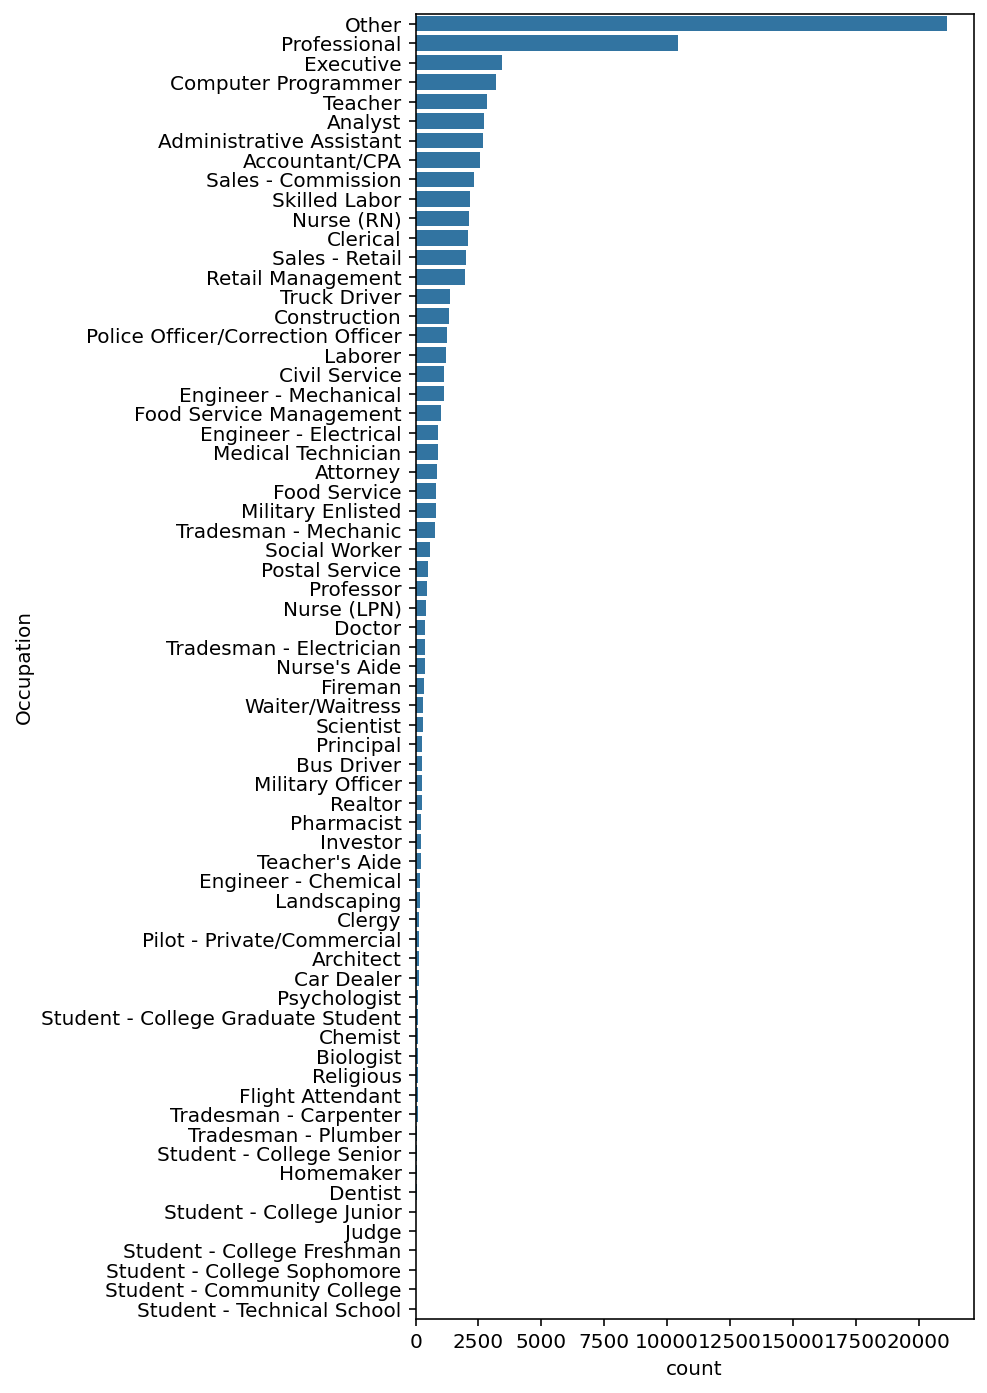

In [38]:
plt.figure(figsize = (5, 12))
order = final.Occupation.value_counts().index
sns.countplot(data = final, y = 'Occupation', order = order, color = base_color);

#### Observations
Most of the borrowers did not specify their occupation and vastly identify as Others. Professional, Executive and Computer Programmer respectively are the most popular occupation After Others amongst Borrowers.

#### Question 7: What is the distribution of loan amounts requested by borrowers?


#### Visualization

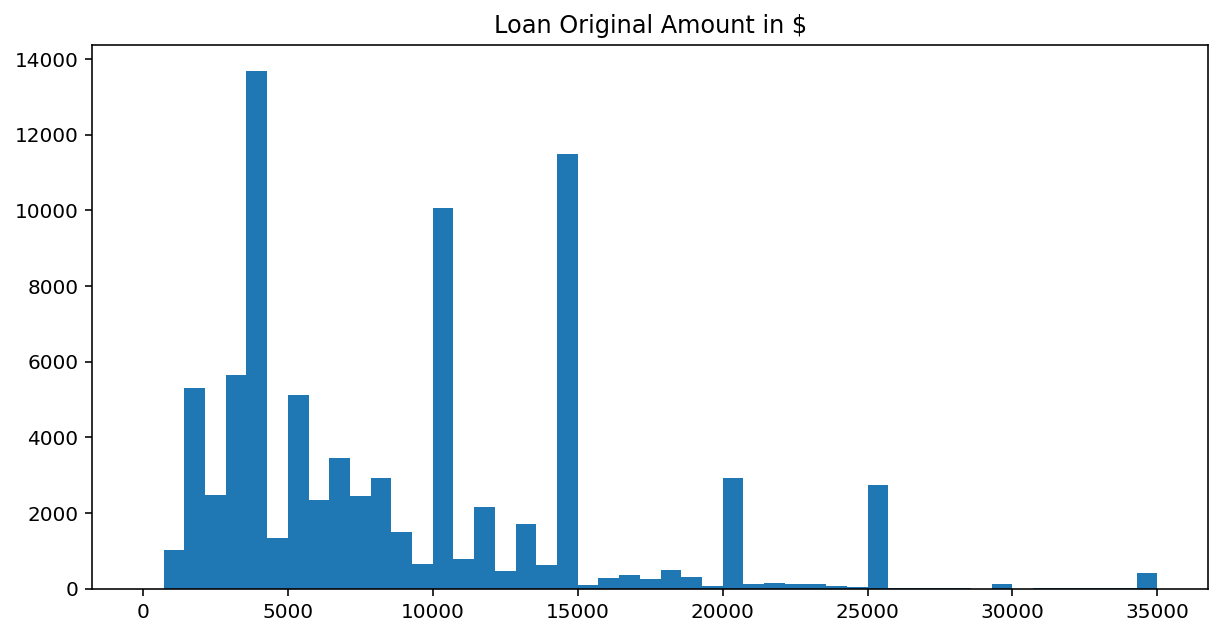

In [39]:
plt.figure(figsize = (10, 5))
bins = np.linspace(0, final.LoanOriginalAmount.max(), 50)
plt.hist(data = final, x = 'LoanOriginalAmount', bins = bins, color = base_color)
plt.title('Loan Original Amount in $');

#### Observations
Majority of the loan amount requested by borrowers is upto 5,000USD, with 15,000USD and 10,000USD also popular amongst borrowers. also most of the loan amount requested do not exceed 15,000USD.

#### Question 8: What is the income range of the borrowers?


#### Visualization

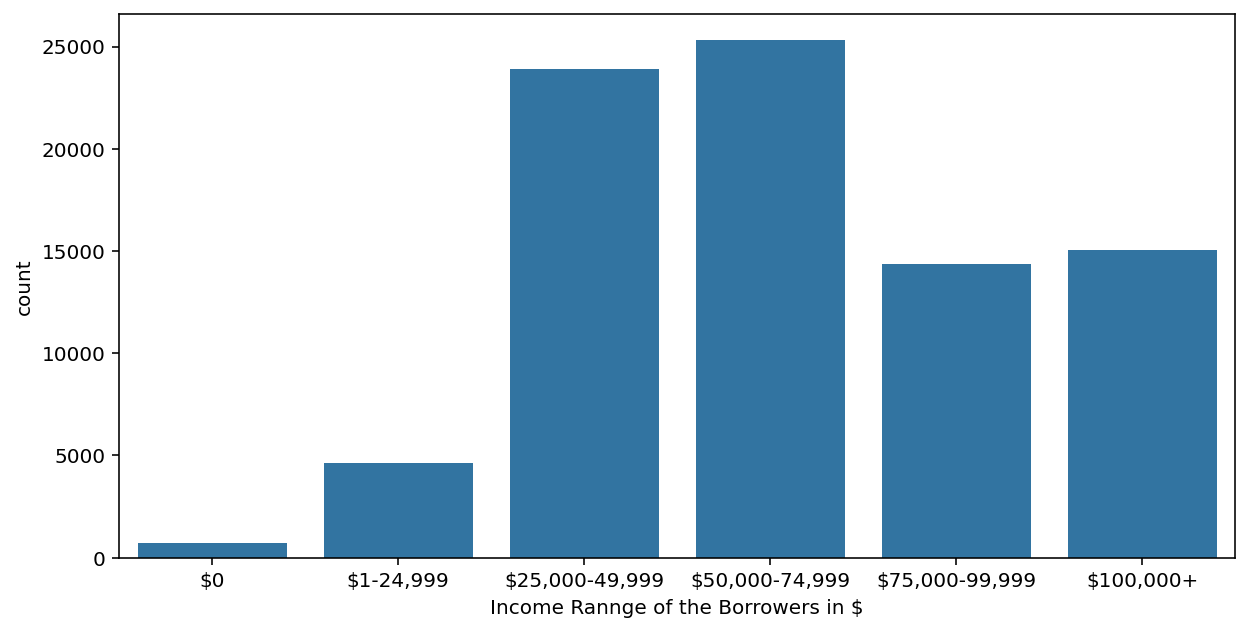

In [40]:
plt.figure(figsize = (10,5))
sns.countplot(data = final, x = 'IncomeRange', color = base_color)
plt.xlabel('Income Rannge of the Borrowers in $');

#### Observations
From the above plot, we can deduce that a vast majority of the borrowers earn 25,000 - 74,999 USD per year and very few of them earn below 25,000 USD

#### Question 9: Are borrowers paying off their loans?


#### Visualization

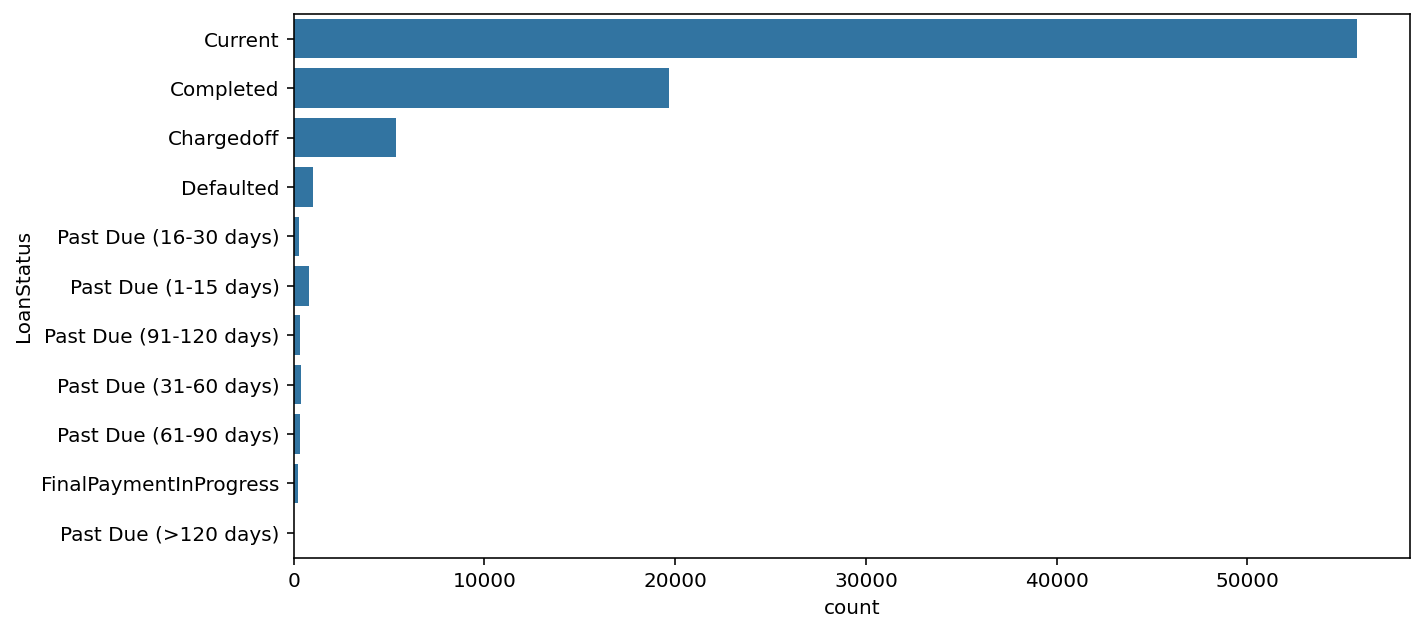

In [41]:
plt.figure(figsize = (10,5))
sns.countplot(data = final, y = 'LoanStatus', color = base_color);

#### Observations
More than 50,000 of the loans are current loans, with 20,000 completed and a small amount defaulted or past the due date, it is fair to say a good proportion of borrowers are paying off their loans. 

#### Question 10: What is the debt to income ratio, are borrowers asking for what their income can take?


#### Visualization

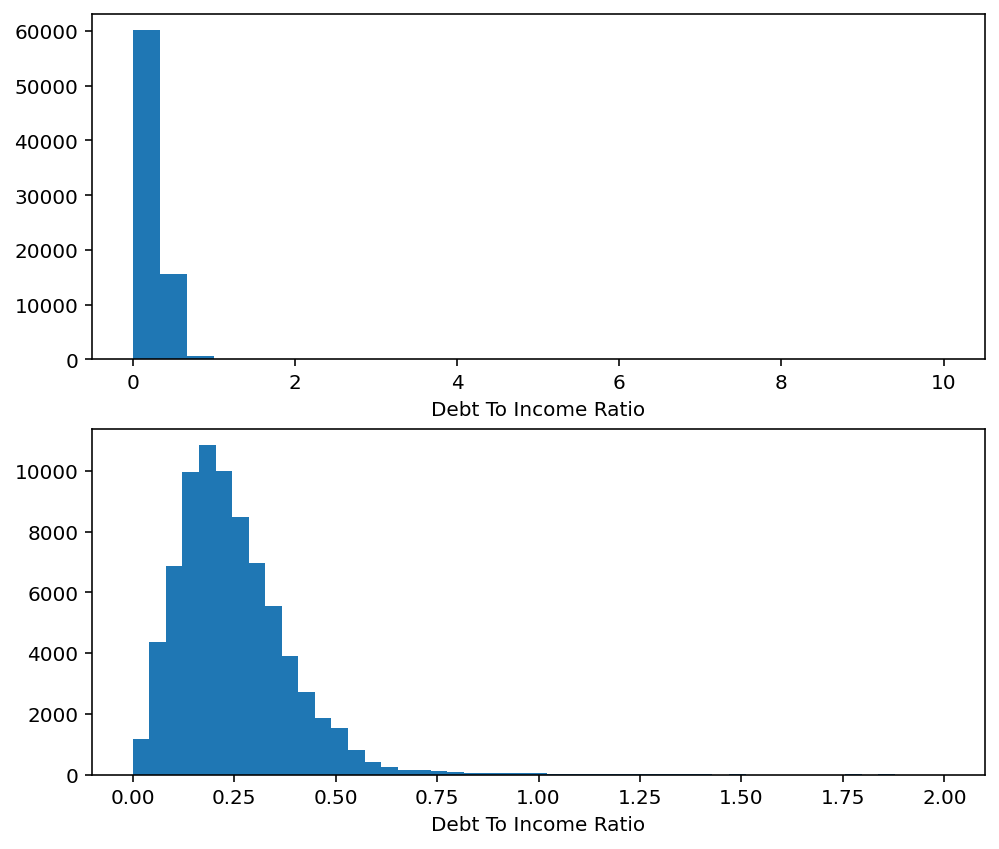

In [42]:
plt.figure(figsize = (8,7))
plt.subplot(2,1,1)
plt.hist(data = final, x = 'DebtToIncomeRatio', bins = 30, color = base_color)
plt.xlabel('Debt To Income Ratio');

bins = np.linspace(0, 2, 50)
plt.subplot(2,1,2)
plt.hist(data = final, x = 'DebtToIncomeRatio', bins = bins, color = base_color)
plt.xlabel('Debt To Income Ratio');

#### Observations
From the above plot, most borrowers prefer to take loans within their means as can be seen with most values in the plot are distributed between 0 and 1

#### Question 11: What is the pattern of loan distribution listings by year, month, day, and hour?


#### Visualization

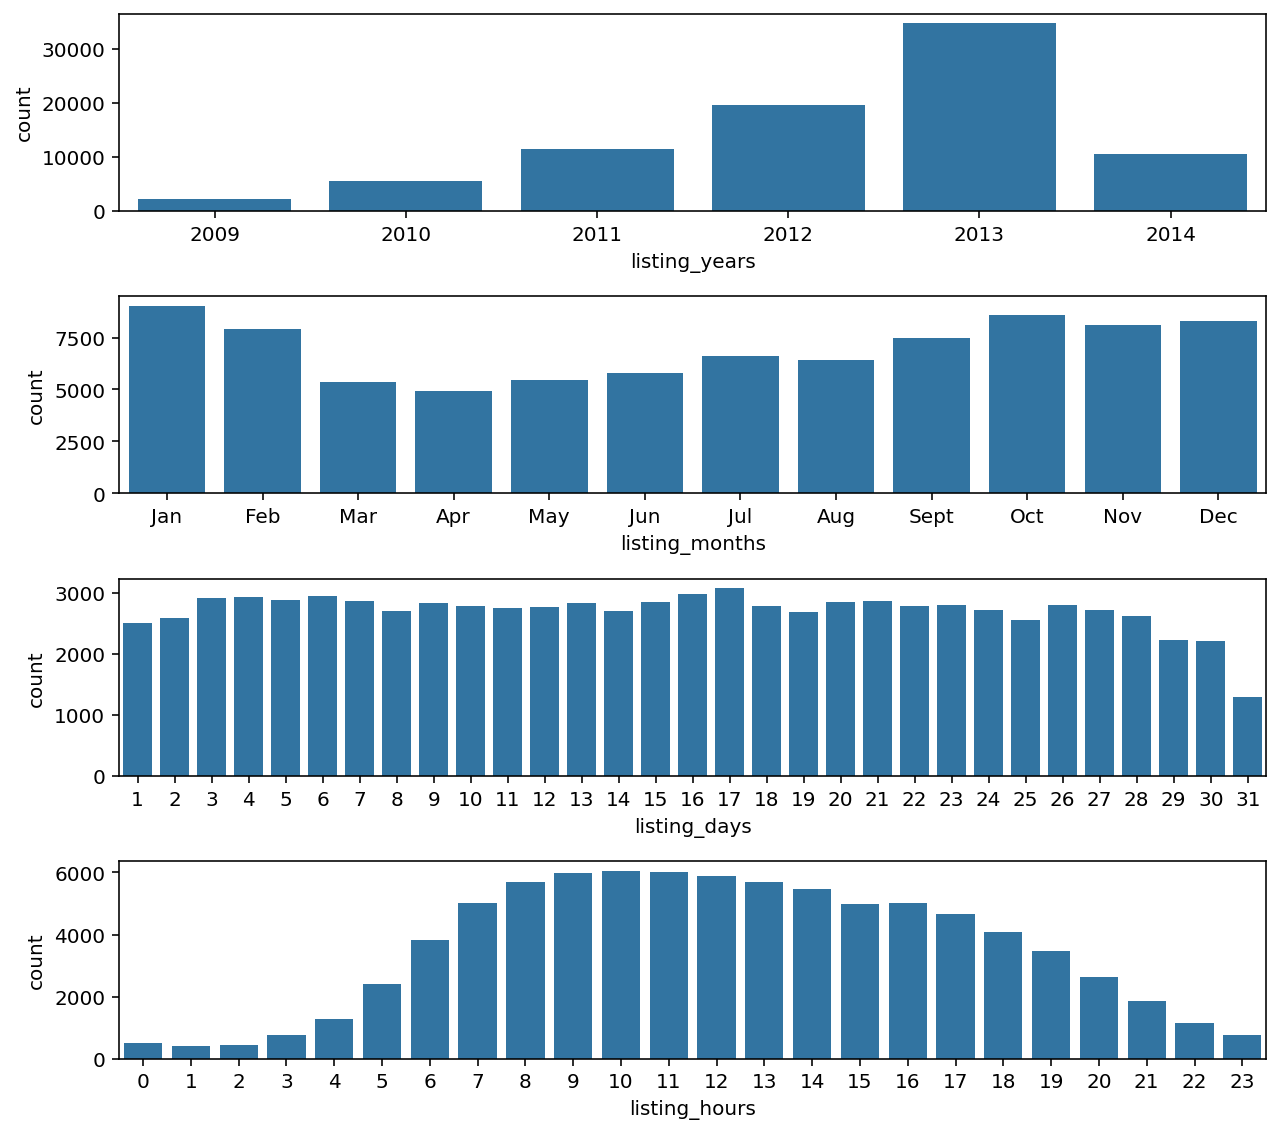

In [43]:
# Store the listing date breakdowns and their plotting indices in a dictionary
listing_breakdown = {
    'listing_years' : [1, final.ListingCreationDate.dt.year],
    'listing_months' : [2, final.ListingCreationDate.dt.month],
    'listing_days' : [3, final.ListingCreationDate.dt.day],
    'listing_hours' : [4, final.ListingCreationDate.dt.hour],
}

# Plot the required information using a for loop
fig = plt.figure(figsize=(9, 8))

for key, value in listing_breakdown.items():
    plt.subplot(4, 1, value[0])
    sns.countplot(x= value[1], color = base_color)
    # Replace the month's integer values (0 - 12) with descriptive strings
    if (key == 'listing_months'):
        plt.xticks(np.arange(12), 
                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
    plt.xlabel(key)
plt.tight_layout();

#### Observations
* The prosper loan platform grew over the years as thers is an obvious growth from 2009 - 2013, although the listing years dropped in 2014 which i suppose has to do with the data upadte (Last updated 11th March 2014)
* Loan request are most common in the first 2 months of the year, January and February and also in the last 3 months of the year, October, November and December.
* Loan request are not common in the first and last few days of the month. majority of Borrowers usually request for loans early in the day.

## Bivariate Exploration

In this section,we will  investigate relationships between pairs of variables in our
data to see if there is a correlation between them.

#### Question 1: What is the relationship between ListingCategory and LoanOriginalAmount. For what reasons do people apply for the largest loans on average?


#### Visualization

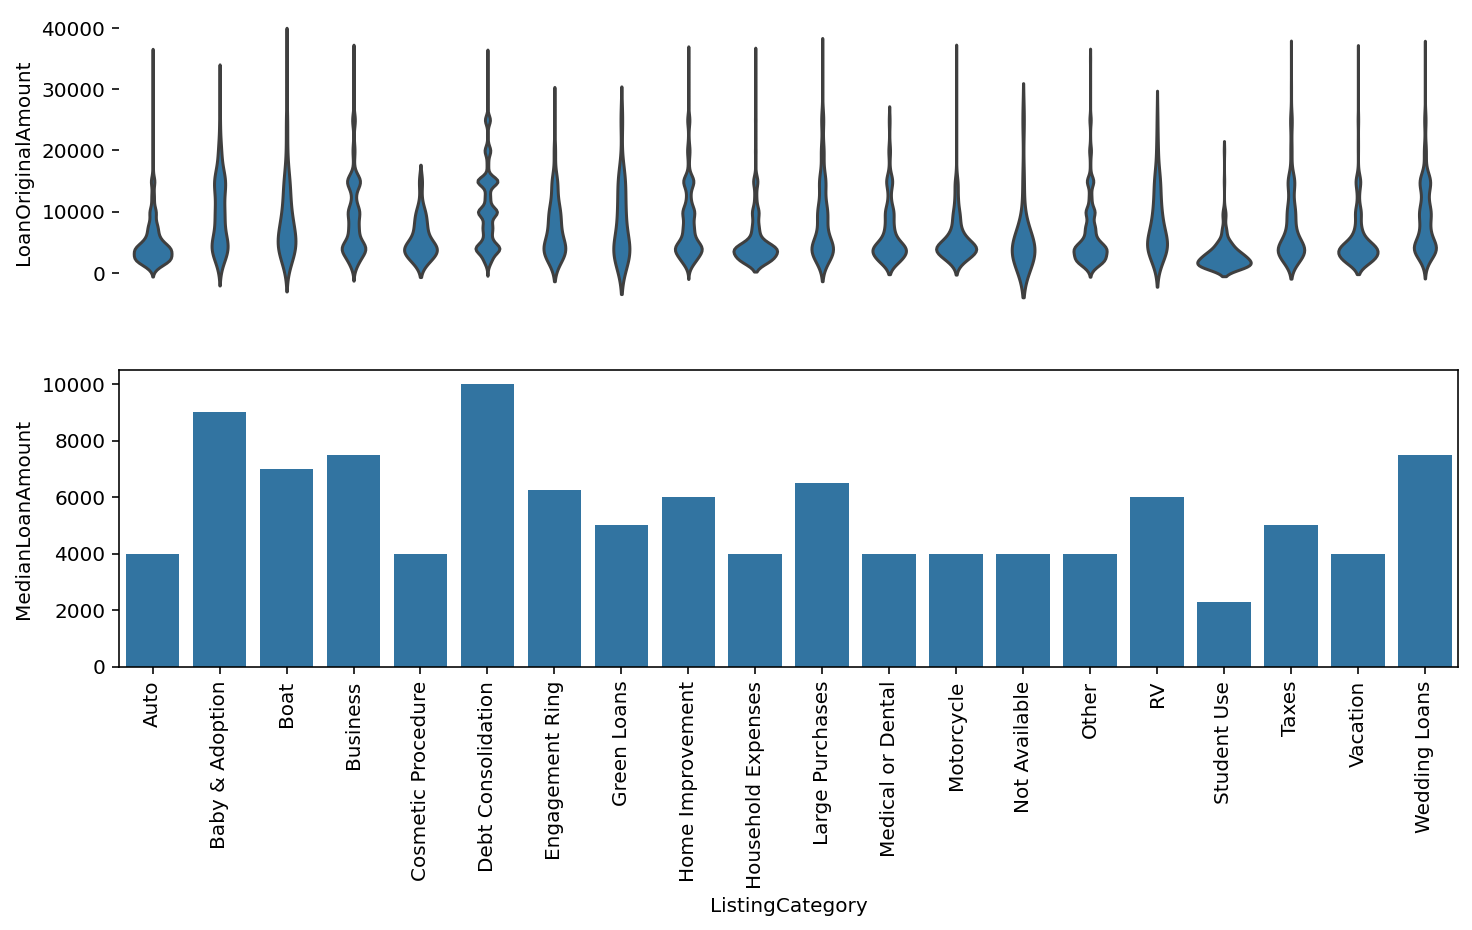

In [44]:
#Get the median loan amount by listing category
med = final.groupby('ListingCategory')['LoanOriginalAmount'].median()
med = med.reset_index(name='MedianLoanAmount')

#Creating Violinplot
plt.figure(figsize = (12, 6))
plt.subplot(2,1,1)
sns.violinplot(data = final.sort_values(by='ListingCategory'), x = 'ListingCategory', y = 'LoanOriginalAmount', inner = None,
                                       color = base_color)
plt.xticks([])
plt.xlabel('')
sns.despine(left = True, bottom = True)

#Create barplot
plt.subplot(2,1,2)
sns.barplot(data = med, x = 'ListingCategory', y = 'MedianLoanAmount', ci = None, color = base_color)
plt.xticks(rotation = 90);

#### Observations
From the plots above, Borrowers mainly apply for loans for Debt Consolidation, Baby & Adoption and Weddings, Students apply the least which is worrying as most loan listings are for keeping up with expensive lifestyles.

#### Question 2: Does the IncomeRange determine if the borrower is a Homeowner?


#### Visualization

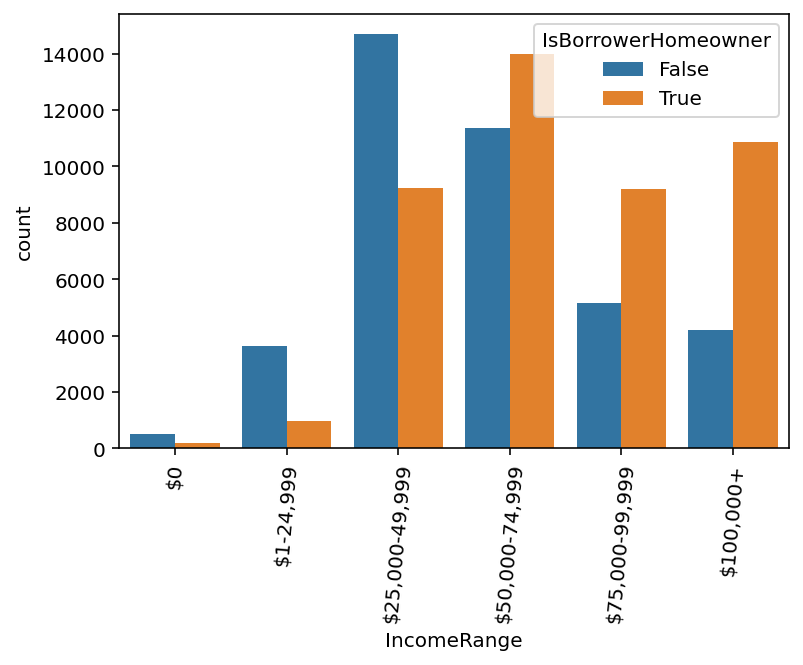

In [45]:
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sns.countplot(data = final, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order = order)
labels = ('Home owner Status by Income Range', 'Frequecy', 'Income Range')
plt.xticks(rotation = 85);

#### Observations
* Borrowers that are high income eaners are more likely to be homeowners than low income earners and this makes sense because they can afford to buy houses due to their highincome.
* Borrowers who earn more 100kUSD are more likely to be home owners than those who earn less. The trend continues downward through borrowers who earn 75kUSD and 50kUSD until it gets to 25kUSD.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

For this section of our exploration, we will be looking at the relationship between three or more variables and there correlate.

#### Question 1: Do homeowners enjoy higher loans accross board than their counterparts?


#### Visualization

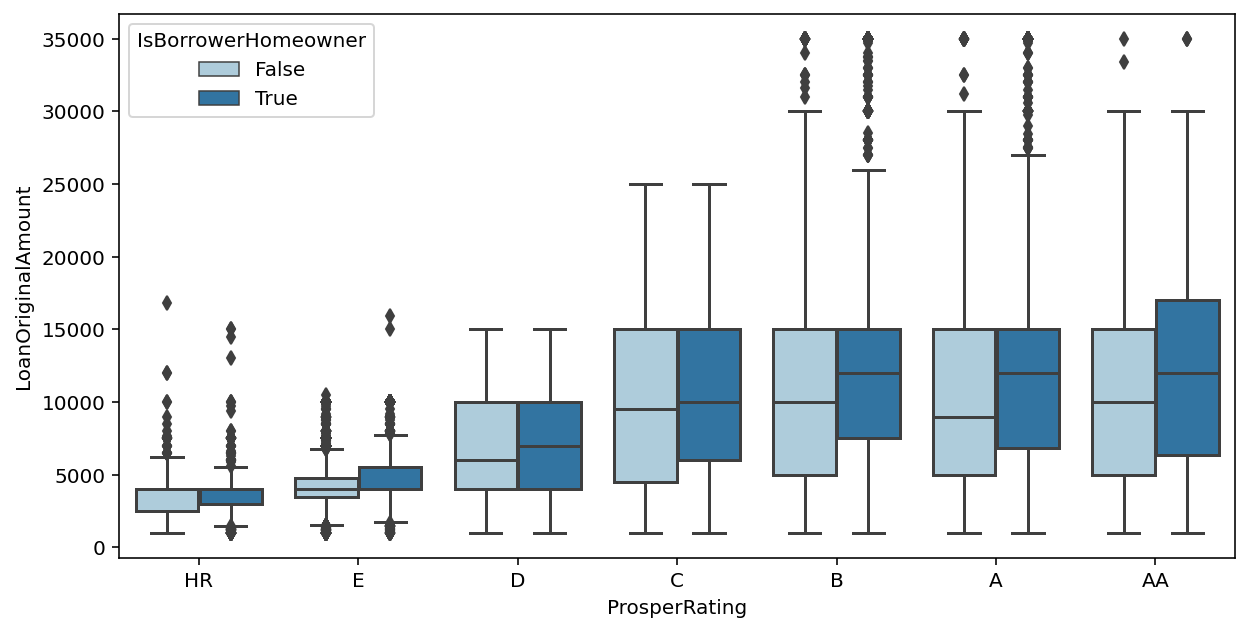

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=final, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired');

#### Observations
From the above plot, we can deduce that Borrowers who are Homeowners obtain higher loan amounts than those who are not homeowners amd so having a House is a plus when asking for a loan with high amount on ProsperLoan.

#### Question 2: What is the distribution of people with verifiable income in the income range column?


#### Visualization

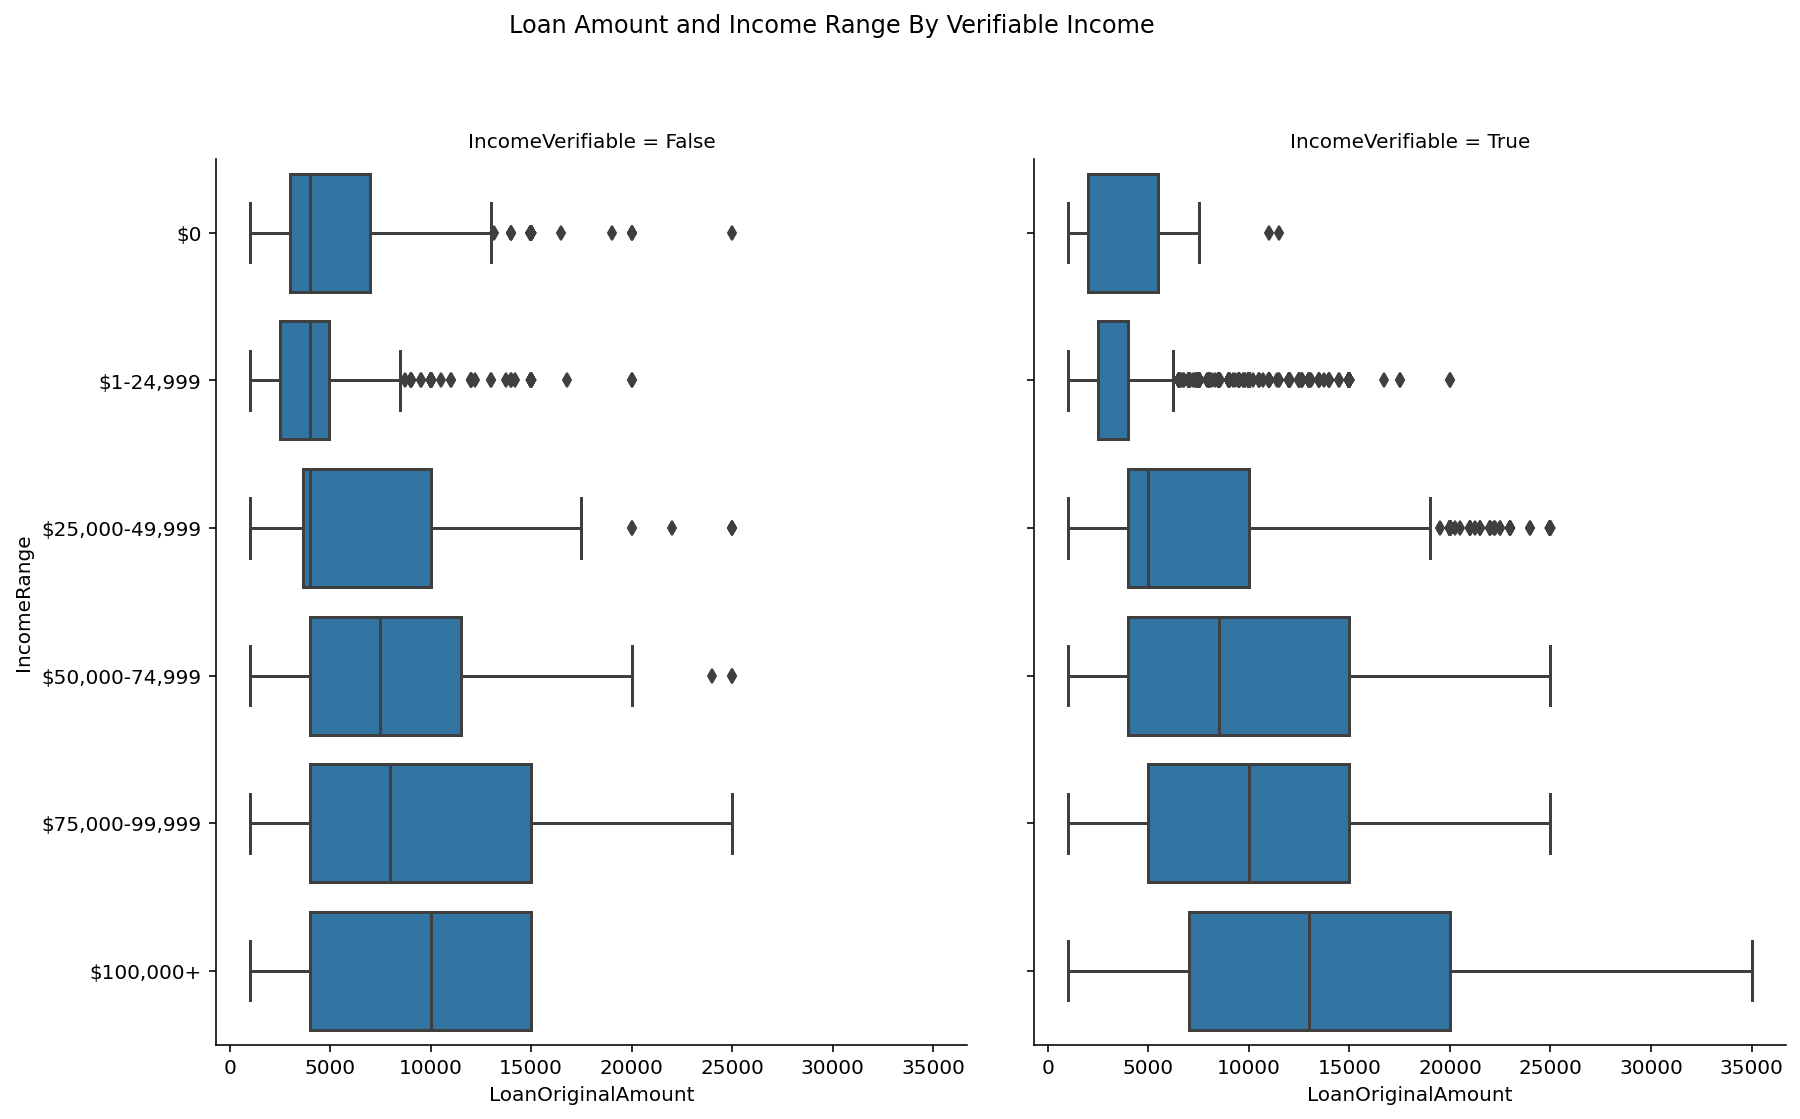

In [47]:
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
box = sns.FacetGrid(data = final, col = 'IncomeVerifiable', height = 4)
box.map(sns.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle('Loan Amount and Income Range By Verifiable Income', y = 1.04)
box.fig.set_size_inches(14,8);

#### Observations
From the above plot, people who earn over 100k USD and have Verifiable income get more loan amount. 

#### Question 3: What is the nature of the combined interaction between BorrowerAPR, LoanOriginalAmount, and ProsperRating?


#### Visualization
We will use a sample of 600 records from the data to avoid oversampling

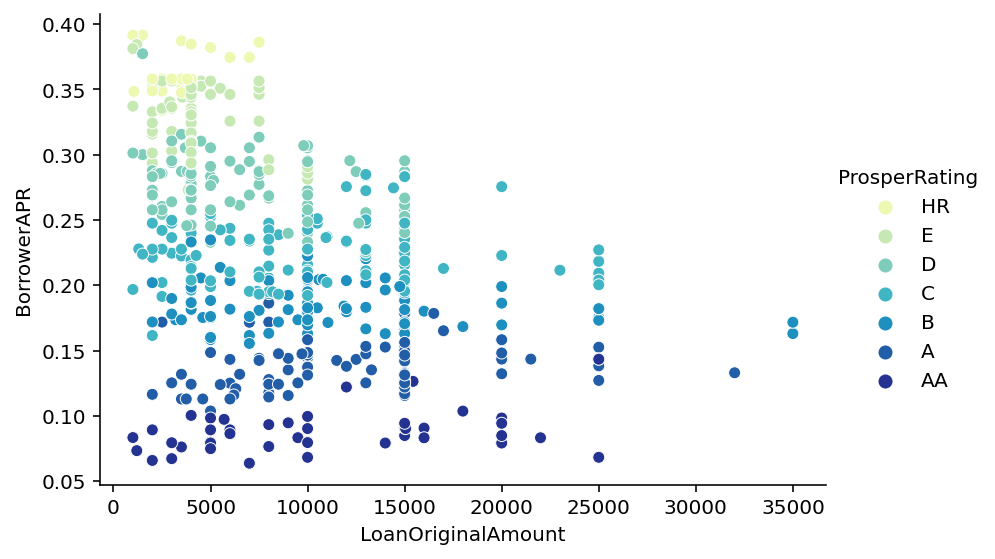

In [48]:
sns.relplot(data = final.sample(600, random_state = 1), y = 'BorrowerAPR', x = 'LoanOriginalAmount',
                               hue = 'ProsperRating', palette = 'YlGnBu', height = 4, aspect = 1.5);

#### Observations
Borrowers with a low ProsperRating have a propensity to take small loans at high interest rate, this shows that Prosper rating is a determinng factor when applying for loans at ProsperLoan.

## Conclusions
* The Major reason for taking out loans was debt consolidation, Borrowers were taking loans to payup another loan owed.
* Employed people take out loans more than unemployed which is expected as there is a source of income to pay back also ProsperRating affects the amount of loan a borrower can take with a better ProsperRating meaning higher loan amount.
* BorrowerState ie State ie state where the borrower was at the time of the listing plays a role in the amount requested by the borrower with more people from major states and cities. 